In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
index = 85000
data = np.random.rand((100000))

Xtrain = data[:index]
ytrain = 4*Xtrain*(1-Xtrain)

Xtest = data[index:]
ytest = 4*Xtest*(1-Xtest)

print(Xtest.shape)

(15000,)


In [26]:
keras.backend.clear_session()

opt = keras.optimizers.Adam(learning_rate=.001)
reg = keras.regularizers.L2(.001)

input = keras.layers.Input(shape=(1,))

l1 = keras.layers.Dense(5, activation='tanh', use_bias=True,
                        kernel_regularizer=reg)(input)

l2 = keras.layers.concatenate([l1, input])

output = keras.layers.Dense(1, activation='linear', use_bias=True)(l2)

model = keras.Model(inputs=input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 5)            10          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 6)            0           ['dense[0][0]',                  
                                                                  'input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 1)            7           ['concatenate[0][0]']        

In [27]:
model.compile(optimizer=opt, loss='mse', 
              metrics=['mse'])

hist = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=50, 
                  batch_size=50, verbose=2)

Epoch 1/50
1700/1700 - 5s - loss: 0.1002 - mse: 0.0990 - val_loss: 0.0812 - val_mse: 0.0800 - 5s/epoch - 3ms/step
Epoch 2/50
1700/1700 - 4s - loss: 0.0683 - mse: 0.0663 - val_loss: 0.0480 - val_mse: 0.0446 - 4s/epoch - 3ms/step
Epoch 3/50
1700/1700 - 5s - loss: 0.0254 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0042 - 5s/epoch - 3ms/step
Epoch 4/50
1700/1700 - 4s - loss: 0.0097 - mse: 0.0021 - val_loss: 0.0086 - val_mse: 0.0014 - 4s/epoch - 3ms/step
Epoch 5/50
1700/1700 - 4s - loss: 0.0079 - mse: 0.0012 - val_loss: 0.0072 - val_mse: 9.8305e-04 - 4s/epoch - 2ms/step
Epoch 6/50
1700/1700 - 4s - loss: 0.0066 - mse: 8.7772e-04 - val_loss: 0.0061 - val_mse: 7.6816e-04 - 4s/epoch - 2ms/step
Epoch 7/50
1700/1700 - 3s - loss: 0.0057 - mse: 6.8009e-04 - val_loss: 0.0053 - val_mse: 5.7900e-04 - 3s/epoch - 2ms/step
Epoch 8/50
1700/1700 - 3s - loss: 0.0050 - mse: 5.5006e-04 - val_loss: 0.0047 - val_mse: 5.1007e-04 - 3s/epoch - 2ms/step
Epoch 9/50
1700/1700 - 3s - loss: 0.0045 - mse: 4.5957e-04 -

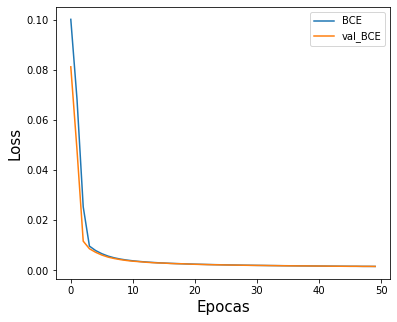

In [28]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
ax1.plot(hist.history['loss'], label='BCE')
ax1.plot(hist.history['val_loss'], label='val_BCE')
ax1.set_xlabel('Epocas', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.legend(loc='best')

In [16]:
type(model.predict([0.5], verbose=0)[0,0])

numpy.float32

In [41]:
seed = .2

x = []
xpred = []
x.append(seed)
xpred.append(seed)


for t in range(20):
    y = 4*x[t]*(1-x[t])
    x.append(y)
    y = model.predict([xpred[t]], verbose=0)[0,0].astype(float)
    xpred.append(y)


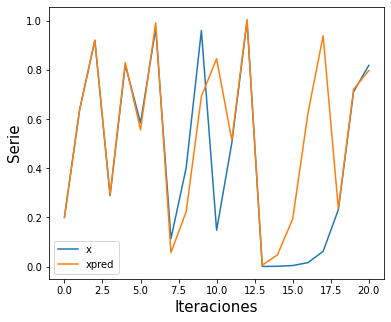

In [42]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,5))

ax1.plot(x, label='x')
ax1.plot(xpred, label='xpred')
ax1.set_xlabel('Iteraciones', fontsize=15)
ax1.set_ylabel('Serie', fontsize=15)
ax1.legend(loc='best')